**MICKEY ZHANG**

Spring 2026

CS 251/2: Data Analysis and Visualization

Project 1: Data Analysis and Visualization

#### Week 2: Start this after Week 2 lab (Lab 1b)


## Task 2: Update `Data` class for data selection

You will update `Data` to allow the user to select one or more data variables based on their string name. This will give you some practice working with numpy basics.

Implement the following methods in `Data`:

- `get_all_data()`
- `head()`: Return the 1st five data samples (all variables)
- `tail()`: Return the last five data samples (all variables)
- `limit_samples(start_row, end_row)`: Update the data so that the object only stores the samples in the contiguous range `[start_row, end_row)`.
- `shuffle(inds)`: Use the list of indices `inds` to change the order of samples in the dataset.
- `select_data(headers, rows=[])`: Return data samples corresponding to the variable names in `headers`. If `rows` is empty, return all samples, otherwise return samples at the indices specified by the `rows` list.


In [2]:
from data import Data
import numpy as np

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 2a. Test `get_all_data`


#### (i) Basic test


In [3]:
iris_filename = "data/iris.csv"
iris_data = Data(iris_filename)
dat = iris_data.get_all_data()
dat[0, :] = -9999
new_dat = iris_data.get_all_data()
if new_dat[0, 0] == -9999.0:
    print("!!You did not return a copy of your data!!\n")
else:
    print("get_all_data seems ok!")

get_all_data seems ok!


#### (ii) Test with passing ndarray into constructor


In [4]:
test_ii = np.arange(12).reshape([3, 4])
test_ii_data = Data(data=test_ii)
test_ii_data_get = test_ii_data.get_all_data()
print(
    f"After passing in test data ndarray into your Data object, the data returned is:\n{test_ii_data_get}"
)
print("It should be:")
print(
    """[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]"""
)

After passing in test data ndarray into your Data object, the data returned is:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
It should be:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### 2b. Test `head` and `tail`


#### (i) Iris


In [5]:
iris_filename = "data/iris.csv"
iris_data = Data(iris_filename)
print(f"Your Iris head (shape={iris_data.head().shape}) is:\n{iris_data.head()}")
print(f"Your Iris tail (shape={iris_data.head().shape}) is:\n{iris_data.tail()}")

Your Iris head (shape=(5, 5)) is:
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]
Your Iris tail (shape=(5, 5)) is:
[[6.7 3.  5.2 2.3 2. ]
 [6.3 2.5 5.  1.9 2. ]
 [6.5 3.  5.2 2.  2. ]
 [6.2 3.4 5.4 2.3 2. ]
 [5.9 3.  5.1 1.8 2. ]]


You should see:

    Your Iris head (shape=(5, 5)) is:
    [[5.1 3.5 1.4 0.2 0. ]
    [4.9 3.  1.4 0.2 0. ]
    [4.7 3.2 1.3 0.2 0. ]
    [4.6 3.1 1.5 0.2 0. ]
    [5.  3.6 1.4 0.2 0. ]]
    Your Iris tail (shape=(5, 5)) is:
    [[6.7 3.  5.2 2.3 2. ]
    [6.3 2.5 5.  1.9 2. ]
    [6.5 3.  5.2 2.  2. ]
    [6.2 3.4 5.4 2.3 2. ]
    [5.9 3.  5.1 1.8 2. ]]


#### (ii) Data with small number of samples


In [6]:
test_filename = "data/test_data_spaces.csv"
test_data = Data(test_filename)
print(f"Your test head (shape={test_data.head().shape}) is:\n{test_data.head()}")
print(f"Your test tail (shape={test_data.head().shape}) is:\n{test_data.tail()}")

Your test head (shape=(3, 4)) is:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
Your test tail (shape=(3, 4)) is:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


You should see:

    Your test head (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]
    Your test tail (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]


### 2c. Test `limit_samples`


In [7]:
iris_filename = "data/iris.csv"
iris_data = Data(iris_filename)
iris_data.limit_samples(50, 100)
print(f"After limiting samples, your test head is:\n{iris_data.head()}")
print(f"After limiting samples, your test tail is:\n{iris_data.tail()}")

After limiting samples, your test head is:
[[7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [5.5 2.3 4.  1.3 1. ]
 [6.5 2.8 4.6 1.5 1. ]]
After limiting samples, your test tail is:
[[5.7 3.  4.2 1.2 1. ]
 [5.7 2.9 4.2 1.3 1. ]
 [6.2 2.9 4.3 1.3 1. ]
 [5.1 2.5 3.  1.1 1. ]
 [5.7 2.8 4.1 1.3 1. ]]


You should see:

    After limiting samples, your test head is:
    [[7.  3.2 4.7 1.4 1. ]
    [6.4 3.2 4.5 1.5 1. ]
    [6.9 3.1 4.9 1.5 1. ]
    [5.5 2.3 4.  1.3 1. ]
    [6.5 2.8 4.6 1.5 1. ]]
    After limiting samples, your test tail is:
    [[5.7 3.  4.2 1.2 1. ]
    [5.7 2.9 4.2 1.3 1. ]
    [6.2 2.9 4.3 1.3 1. ]
    [5.1 2.5 3.  1.1 1. ]
    [5.7 2.8 4.1 1.3 1. ]]


### 2d. Test `shuffle`


In [8]:
iris_filename = "data/iris.csv"
iris_data = Data(iris_filename)

np.random.seed(0)
inds = np.random.permutation(iris_data.get_num_samples())
iris_data.shuffle(inds)
print(f"After shuffling samples, your test head is:\n{iris_data.head()}")
print(f"After shuffling samples, your test tail is:\n{iris_data.tail()}")

After shuffling samples, your test head is:
[[5.8 2.8 5.1 2.4 2. ]
 [6.  2.2 4.  1.  1. ]
 [5.5 4.2 1.4 0.2 0. ]
 [7.3 2.9 6.3 1.8 2. ]
 [5.  3.4 1.5 0.2 0. ]]
After shuffling samples, your test tail is:
[[4.9 3.1 1.5 0.1 0. ]
 [6.3 2.9 5.6 1.8 2. ]
 [5.8 2.7 4.1 1.  1. ]
 [7.7 3.8 6.7 2.2 2. ]
 [4.6 3.2 1.4 0.2 0. ]]


You should see:

    After shuffling samples, your test head is:
    [[5.8 2.8 5.1 2.4 2. ]
    [6.  2.2 4.  1.  1. ]
    [5.5 4.2 1.4 0.2 0. ]
    [7.3 2.9 6.3 1.8 2. ]
    [5.  3.4 1.5 0.2 0. ]]
    After shuffling samples, your test tail is:
    [[4.9 3.1 1.5 0.1 0. ]
    [6.3 2.9 5.6 1.8 2. ]
    [5.8 2.7 4.1 1.  1. ]
    [7.7 3.8 6.7 2.2 2. ]
    [4.6 3.2 1.4 0.2 0. ]]


### 2e. Test `select_data`


#### (i) Test data with spaces


In [9]:
test_filename = "data/test_data_spaces.csv"
test_data = Data(test_filename)

one = test_data.select_data(["spaces"])
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(["spaces", "places"])
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

All data in the "spaces" variable (shape=(3, 1)): 
[[ 2.]
 [ 6.]
 [10.]]
All data in the "spaces" and "places" variables (shape=(3, 2)): 
[[ 2.  4.]
 [ 6.  8.]
 [10. 12.]]


You should see:

    All data in the "spaces" variable (shape=(3, 1)):
    [[ 2.]
     [ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(3, 2)):
    [[ 2.  4.]
     [ 6.  8.]
     [10. 12.]]


#### (ii) Test data with spaces, some samples


In [10]:
test_filename = "data/test_data_spaces.csv"
test_data = Data(test_filename)

rows = [1, 2]

one = test_data.select_data(["spaces"], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(["spaces", "places"], rows=rows)
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

All data in the "spaces" variable (shape=(2, 1)): 
[[ 6.]
 [10.]]
All data in the "spaces" and "places" variables (shape=(2, 2)): 
[[ 6.  8.]
 [10. 12.]]


You should see:

    All data in the "spaces" variable (shape=(2, 1)):
    [[ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(2, 2)):
    [[ 6.  8.]
     [10. 12.]]


#### (iii) Test data with spaces, non-contiguous samples


In [11]:
test_filename = "data/test_data_spaces.csv"
test_data = Data(test_filename)

rows = [0, 2]

one = test_data.select_data(["spaces"], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(["bad", "places"], rows=rows)
print(f'All data in the "bad" and "places" variables (shape={two.shape}): \n{two}')

All data in the "spaces" variable (shape=(2, 1)): 
[[ 2.]
 [10.]]
All data in the "bad" and "places" variables (shape=(2, 2)): 
[[ 3.  4.]
 [11. 12.]]


You should see:

    All data in the "spaces" variable (shape=(2, 1)):
    [[ 2.]
    [10.]]
    All data in the "bad" and "places" variables (shape=(2, 2)):
    [[ 3.  4.]
    [11. 12.]]


## Task 3: `Analysis` class

In this task, you will implement the `Analysis` class that analyzes and visualizes complex datasets comprised of many variables. After creating `Analysis`, you’ll use it alongside your `Data` class to analyze an open-access scientific dataset. _Can you use the tools you’ve developed to extract real-world truths from data?_

You will build on this object-oriented approach to do advanced data analysis in future projects, making it easier for you to apply the tools you develop this week to a wide range of datasets.

It is crucial for your success in CS251 to become fluent in the **vectorization** of matrix operations (**NO LOOPS**) with Numpy and the visualization of data with Matplotlib. We will use these Python packages each and every week. Please bring your questions to class and office hours so that we can help you get comfortable with these essential tools before the math gets more complex and interesting.

In method docstrings that state that loops are not allowed, **we will take off points for every loop that we see — vectorized computations only in analysis functions!** You may use loops in plotting-related methods.

**TODO:**

- Download the `analysis.py` code template.


### Analysis and summary statistic methods

To actually perform computations on data, you will implement the following methods in `analysis.py`, modeled off of common functions in the `pandas` python package (https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html) that we will adopt later in the semester:

- `set_data(data)`
- `min(headers, rows=[])`: Computes the minimum of each variable in `headers` in the data object. Possibly only in a subset of data samples (`rows`) if `rows` is not empty.
- `max(headers, rows=[])`: Computes the maximum of each variable in `headers` in the data object.
- `range(headers, rows=[])`: Computes the range [min, max] for each variable in `headers` in the data object.
- `mean(headers, rows=[])`: Computes the mean for each variable in `headers` in the data object. Equation for mean: $$\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$$ where $x_i$ is the $i^{th}$ data sample and $N$ is the total number of data samples in the dataset.
- `var(headers, rows=[])`: Computes the variance for each variable in `headers` in the data object. Equation for sample variance: $$s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.
- `std(headers, rows=[])`: Computes the standard deviation for each variable in `headers` in the data object. Equation for sample standard deviation: $$s^2 = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2}$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.


In [12]:
from analysis import Analysis

iris_filename = "data/iris.csv"
iris_data = Data(iris_filename)
an = Analysis(iris_data)

#### (i) Test `min`


In [13]:
print(
    f"Your minimum values for length vars (all samples) are\n{an.min(['sepal_length', 'petal_length'])}\nand should be\n[4.3 1. ]"
)
print(
    f"Your minimum values for length vars (1st 10 samples) are\n{an.min(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.4 1.3]"
)
print(
    f"Your shape is {an.min(['sepal_length', 'petal_length']).shape}\nand should be (2,)"
)

Your minimum values for length vars (all samples) are
[4.3 1. ]
and should be
[4.3 1. ]
Your minimum values for length vars (1st 10 samples) are
[4.4 1.3]
and should be
[4.4 1.3]
Your shape is (2,)
and should be (2,)


#### (ii) Test `range`


In [14]:
all_mins, all_maxs = an.range(["sepal_length", "sepal_width"])
some_mins, some_maxs = an.range(["sepal_length", "sepal_width"], rows=np.arange(10))
print(
    f"Your range for sepal vars (all samples) is\nmins:{all_mins}\nmaxs:{all_maxs}\nand should be\nmins:[4.3 2. ]\nmaxs:[7.9 4.4]\n"
)
print(
    f"Your range for sepal vars (1st 10 samples) is\nmins:{some_mins}\nmaxs:{some_maxs}\nand should be\nmins:[4.4 2.9]\nmaxs:[5.4 3.9]\n"
)
print(f"Your min shape is {all_mins.shape}\nand should be (2,)")
print(f"Your max shape is {all_maxs.shape}\nand should be (2,)")

Your range for sepal vars (all samples) is
mins:[4.3 2. ]
maxs:[7.9 4.4]
and should be
mins:[4.3 2. ]
maxs:[7.9 4.4]

Your range for sepal vars (1st 10 samples) is
mins:[4.4 2.9]
maxs:[5.4 3.9]
and should be
mins:[4.4 2.9]
maxs:[5.4 3.9]

Your min shape is (2,)
and should be (2,)
Your max shape is (2,)
and should be (2,)


#### (iii) Test `mean`


In [15]:
print(
    f"Your mean values for length vars (all samples) are\n{an.mean(['sepal_length', 'petal_length'])}\nand should be\n[5.84333333 3.758     ]"
)
print(
    f"Your mean values for length vars (1st 10 samples) are\n{an.mean(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.86 1.45]"
)
print(
    f"Your shape is {an.mean(['sepal_length', 'petal_length']).shape}\nand should be (2,)"
)

Your mean values for length vars (all samples) are
[5.84333333 3.758     ]
and should be
[5.84333333 3.758     ]
Your mean values for length vars (1st 10 samples) are
[4.86 1.45]
and should be
[4.86 1.45]
Your shape is (2,)
and should be (2,)


#### (iv) Test `var`


In [16]:
print(
    f"Your variance values for all vars (all samples) are\n{an.var(an.data.get_headers()[:-1])}\nand should be\n[0.68569351 0.18997942 3.11627785 0.58100626]"
)
print(
    f"Your variance values for all vars (1st 10 samples) are\n{an.var(an.data.get_headers()[:-1], rows=np.arange(10))}\nand should be\n[0.08488889 0.09433333 0.01166667 0.00622222]"
)

Your variance values for all vars (all samples) are
[0.68569351 0.18997942 3.11627785 0.58100626]
and should be
[0.68569351 0.18997942 3.11627785 0.58100626]
Your variance values for all vars (1st 10 samples) are
[0.08488889 0.09433333 0.01166667 0.00622222]
and should be
[0.08488889 0.09433333 0.01166667 0.00622222]


#### (v) Test `std`


In [17]:
print(
    f"Your stdev values for all vars (all samples) are\n{an.std(an.data.get_headers()[:-1])}\nand should be\n[0.82806613 0.43586628 1.76529823 0.76223767]"
)
print(
    f"Your stdev values for all vars (1st 10 samples) are\n{an.std(an.data.get_headers()[:-1], rows=np.arange(10))}\nand should be\n[0.29135698 0.30713732 0.10801234 0.07888106]"
)

Your stdev values for all vars (all samples) are
[0.82806613 0.43586628 1.76529823 0.76223767]
and should be
[0.82806613 0.43586628 1.76529823 0.76223767]
Your stdev values for all vars (1st 10 samples) are
[0.29135698 0.30713732 0.10801234 0.07888106]
and should be
[0.29135698 0.30713732 0.10801234 0.07888106]


## Task 4: Data visualization with matplotlib

In this task, you will create some plots to practice using matplotlib. You will write several functions to make some kinds of plots that will come up frequently in the coming weeks.


In [18]:
import matplotlib.pyplot as plt

### 4a. Join data with a smooth curve

In the cell below, create a single plot of the functions $sin(x)$, $sin(x)^3$, and $sin(x)^5$ in different colors in the range [-6.28, 6.28]. Points should be connected with a smooth curve in each case. Plug in more than 50 x values otherwise your curves will look jagged.

Your plots should be "high quality", which means that they should contain:

- a helpful title
- clearly differentiated curve colors. **Do not use the default colors, pick your own colors.**
- a legend showing which color scales map onto which curves
- only the x tick marks -6.28, -3.14, 0, +3.14, +6.28
- only the y tick marks -1, 0, +1
- there should be no garbage text output below, just the plot


([<matplotlib.axis.YTick at 0x1919a42dfd0>,
 [Text(0, -1, '−1'), Text(0, 0, '0'), Text(0, 1, '1')])

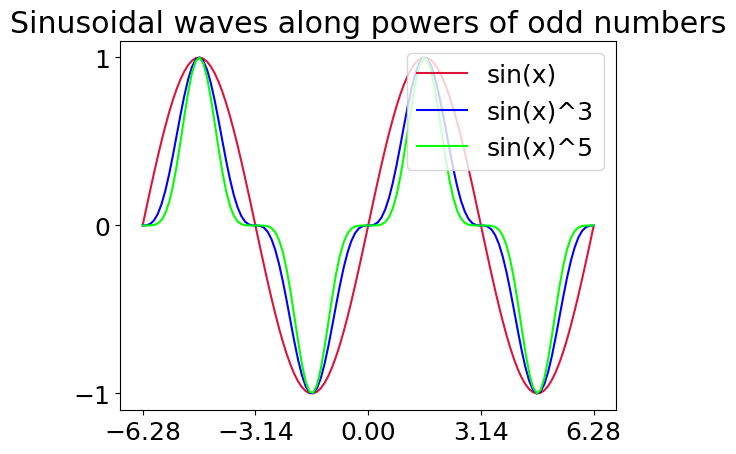

In [19]:
# YOUR CODE HERE

# x values
x = np.linspace(-6.28, 6.28, 120)

# setting up each sin function using sin
y1, y2, y3 = np.sin(x), np.sin(x) ** 3, np.sin(x) ** 5

# plot each function
plt.plot(x, y1, color="crimson", label="sin(x)")
plt.plot(x, y2, color="blue", label="sin(x)^3")
plt.plot(x, y3, color="lime", label="sin(x)^5")

# setting titel + legen
plt.title("Sinusoidal waves along powers of odd numbers")
plt.legend()

# x ticks and y ticks
plt.xticks([-6.28, -3.14, 0, 3.14, 6.28])
plt.yticks([-1, 0, 1])

### 4b. Anscombe's Quartet: Create a 2x2 grid of plots

In the cell below, create a SINGLE figure with four _scatter plots_ in it (2 rows, 2 columns). This should leverage matplotlib's `subplots` function and create ONE cell output (not 4).

1. You are plotting the data in `anscombe.csv`: The first set of points should be plotted on the top-left (row indices 0-10), the second set should be on the top-right (row indices 11-21), the third set should be on the bottom-left (row indices 22-32), and the last set on the bottom-right (row indices 33-43).
2. Make the markers in each subplot a different shape for fun.
3. You should not have connected curves in these plots.
4. The x/y plot limits should the same in all plots (and include all data samples).
5. You should label your axes.


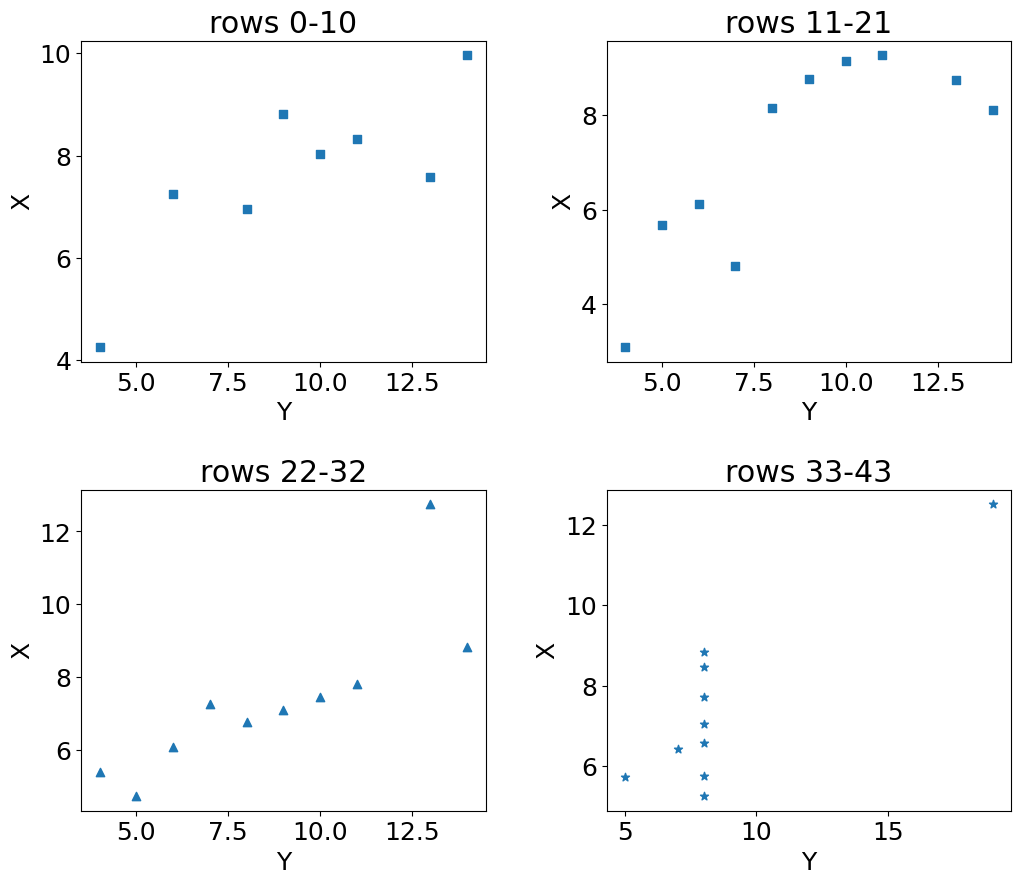

In [47]:
# YOUR CODE HERE
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
data = np.genfromtxt("data/anscombe.csv", delimiter=",")


ax[0, 0].scatter(data[0:10, 1], data[0:10, 2], marker="s")
ax[0, 0].set_title("rows 0-10")
ax[0, 0].set_xlabel("Y")
ax[0, 0].set_ylabel("X")


ax[0, 1].scatter(data[11:21, 1], data[11:21, 2], marker="s")
ax[0, 1].set_title("rows 11-21")
ax[0, 1].set_xlabel("Y")
ax[0, 1].set_ylabel("X")

ax[1, 0].scatter(data[22:32, 1], data[22:32, 2], marker="^")
ax[1, 0].set_title("rows 22-32")
ax[1, 0].set_xlabel("Y")
ax[1, 0].set_ylabel("X")

ax[1, 1].scatter(data[33:43, 1], data[33:43, 2], marker="*")
ax[1, 1].set_title("rows 33-43")
ax[1, 1].set_xlabel("Y")
ax[1, 1].set_ylabel("X")

plt.subplots_adjust(hspace=0.4, wspace=0.3)


plt.show()

### 4c. `scatter` method in `Analysis`

Scatter plots will come up a lot in this course. Fill in the `scatter` method in the `Analysis` class to automate the process of selecting (x, y) data from a dataset, creating a scatter plot, labeling axes, and labeling the plot with a title.


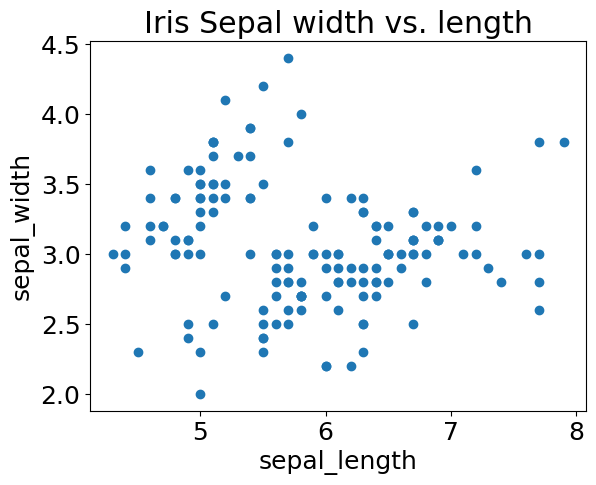

Your x sample shape is (150,) and should be (150,) or (150, 1)
Your y sample shape is (150,) and should be (150,) or (150, 1)


In [48]:
iris_filename = "data/iris.csv"
iris_data = Data(iris_filename)
iris_an = Analysis(iris_data)

x_samps, y_samps = iris_an.scatter(
    "sepal_length", "sepal_width", "Iris Sepal width vs. length"
)
iris_an.show()

print(f"Your x sample shape is {x_samps.shape} and should be (150,) or (150, 1)")
print(f"Your y sample shape is {y_samps.shape} and should be (150,) or (150, 1)")

### 4d. `pair_plot` method in `Analysis`

When doing exploratory data analysis, it is often helpful to create scatter plots of all pairs of variables to visually discover relationships and develop hypotheses to explore quantitatively. For example, if we have variables A, B, C, we would create scatter plots (x=A, y=B), (x=A, y=C), (x=B, y=C). A grid of subplots showing all these scatter plots is called a **pair plot**. If there are $M$ variables, then the grid of plots is $M\times M$.

- In `Analysis`, implement `pair_plot` and test your implementation below on the Iris data.
  - The y axis of the FIRST column should be labeled with the appropriate variable being plotted there.
  - The x axis of the LAST row should be labeled with the appropriate variable being plotted there.
  - Only label the axes and ticks on the FIRST column and LAST row. There should be no labels on other plots (it looks too cluttered otherwise!).
  - Do have tick MARKS on all plots (just not the labels).


Your plot on the bottom-left should look like:

<div>
<center>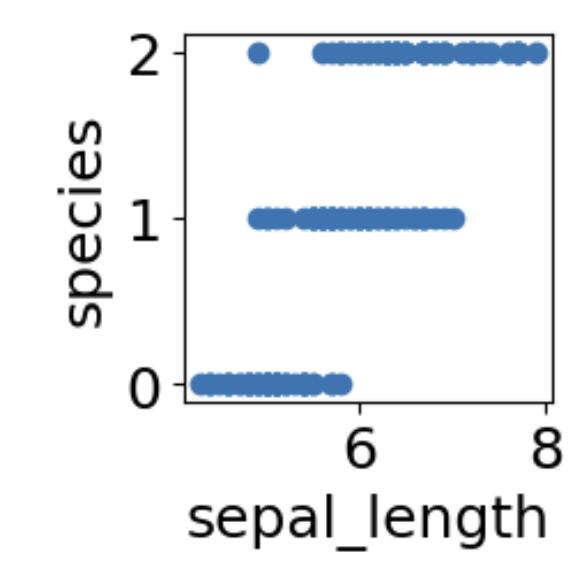</center>
</div>

<!-- 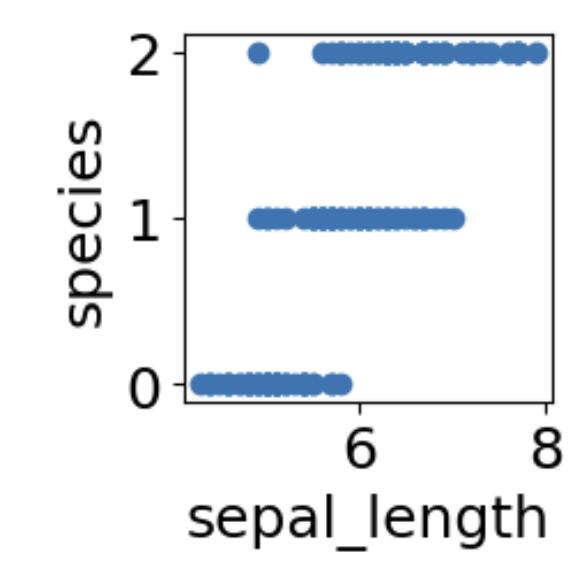 -->


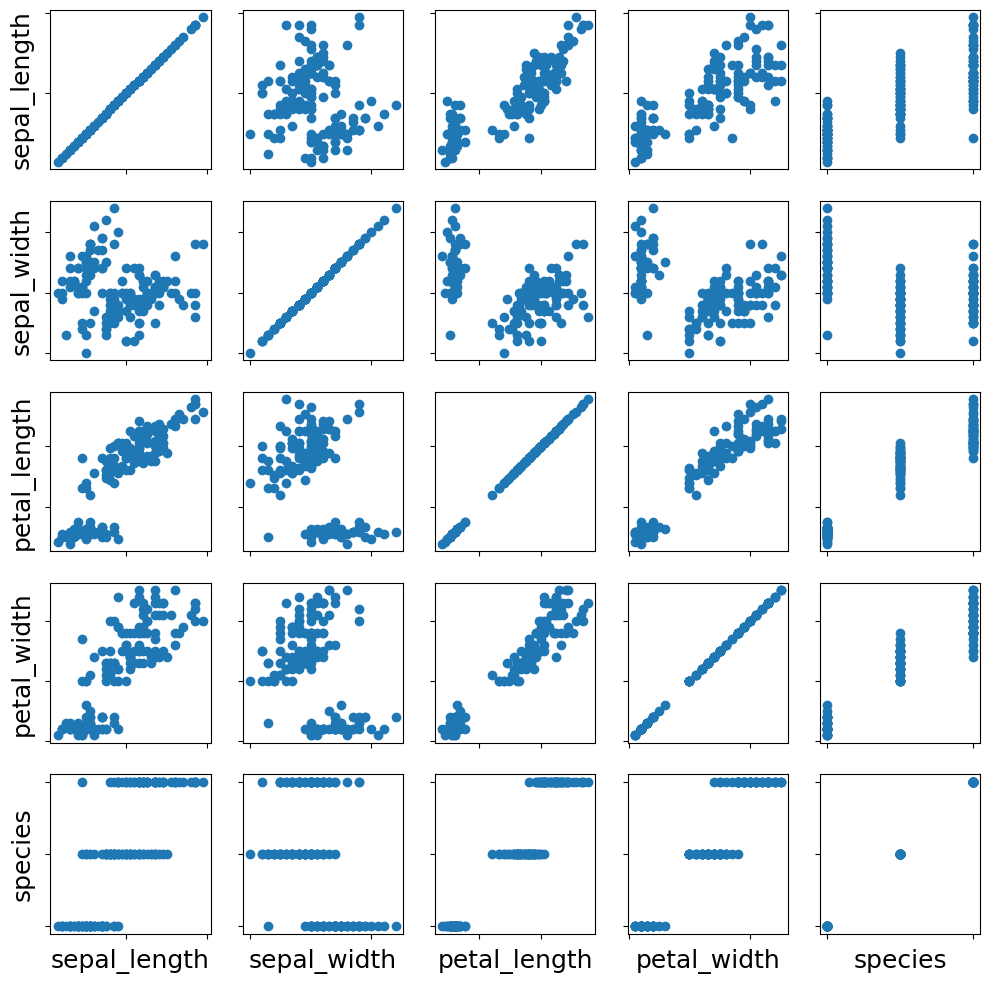

Do you have a 5x5 grid of plots? True


In [50]:
iris_filename = "data/iris.csv"
iris_data = Data(iris_filename)
iris_an = Analysis(iris_data)

fig, axes = iris_an.pair_plot(iris_data.get_headers())
iris_an.show()

print(f"Do you have a 5x5 grid of plots? {axes.shape[0] == 5 and axes.shape[1] == 5}")

## Task 5: Real-world application

Analyze one real-world dataset of your choice: [e.g. wine quality dataset, Old Faithful geyser dataset, Auto MPG dataset, tips dataset]. Use your **existing** visualization and analysis tools to try to learn something about the real world from this dataset (_you can implement other analyses and explore other visualizations as extensions; see suggestions in the Project 1 Extensions post on Google Classroom_).

In your analysis, include the following:

1. Important information about the dataset.
   - Who created it and when.
   - Why was it created / what information does it contain about the real world?
   - How many samples and variables. The name and meaning of each variable (_including units!_).
2. Use scatter plot, pair plot, or other visualizations and determine which helps you learn the most about your dataset.
   - Create at least one "good" graph that presents the data in a helpful way and at least one “bad” graph that is not helpful for gleaning insight into your dataset.
3. Briefly (but completely) explain your findings in the Markdown cell below alongside well-labeled graphs that support your conclusions.
4. Compute summary statistics (i.e. range, mean, standard deviation) of key variables in the dataset. Provide information about the units of the summary statistics and explain what they mean about the world.
5. Briefly assess the degree to which the dataset is **biased**. _For example, if the dataset measures aspects of people or geographies, are any excluded/undersampled (or conversely, oversampled)?_ If there is bias, how does this affect the conclusions/observations of your analysis?


In [60]:
# Code to import your dataset and create visualizations here.

old_faithful_data = Data("data/OldFaithful.csv")
old_faithful_an = Analysis(old_faithful_data)
# You may decide to split up the plots across multiple cells and interleave them with markdown cells

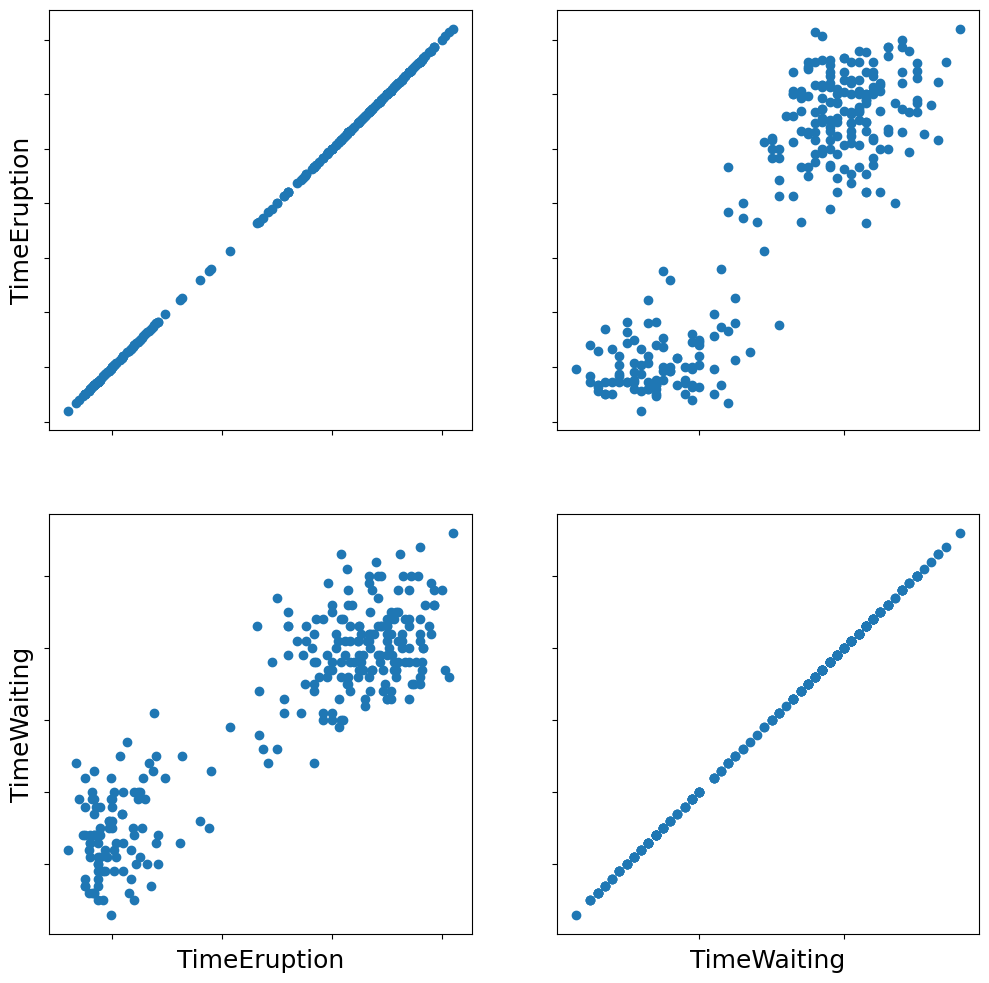

In [61]:
# pair plot

fig, axes = old_faithful_an.pair_plot(old_faithful_data.get_headers())

In [76]:
# Statistics

# finding the mins and maxes
mins, maxs = old_faithful_an.range(["TimeEruption", "TimeWaiting"])

print(f"Minimum of TimeEruption: {mins[0]} and Minimum of TimeWating: {mins[1]}")
print(f"Maximum of TimeEruption: {maxs[0]} and Maximum of TimeWating: {maxs[1]}")

# finding the means
means = old_faithful_an.mean(["TimeEruption", "TimeWaiting"])

print(f"Mean of TimeEruption: {means[0]} and Mean of TimeWaiting: {means[1]}")


# finding the std
std = old_faithful_an.std(["TimeEruption", "TimeWaiting"])

print(f"STD of TimeEruption: {std[0]} and STD of TimeWaiting: {std[1]}")

Minimum of TimeEruption: 1.6 and Minimum of TimeWating: 43.0
Maximum of TimeEruption: 5.1 and Maximum of TimeWating: 96.0
Mean of TimeEruption: 3.4877830882352936 and Mean of TimeWaiting: 70.8970588235294
STD of TimeEruption: 1.141371251105208 and STD of TimeWaiting: 13.594973789999397


**Explain your findings below:**

_Feel free to merge/revise the order of the items below to suit your preferred style/flow. However, be sure to address all the key points from above._


1. **Dataset information:**

Creators: Originally collected by geologists and park rangers at Yellowstone National Park. One of the most famous versions was popularized by Azzalini and Bowman (1990).

Purpose: To study the relationship between the duration of an eruption and the time spent waiting until the next one. It helps park rangers predict when the next "show" will start for tourists.

Samples & Variables: The dataset typically contains 272 observations and 2 variables:

eruptions (float): The duration of the eruption in minutes.

waiting (numeric): The time interval until the next eruption in minutes.


2.

**"Good" plot**:

![Good plot](assets/good_plot1.png)

**"Bad" plot**:

![Bad plot](assets/bad_plot1.png)


3. **Findings from plots:**

From the good plot specifically, there is a positive correlation between time waiting and time eruption. Specificalyl shown by the upward trend of the data as the dependent variable -> infinity


4. **Summary statistics:**

Eruption duration and waiting time both vary; neither is a single fixed number.
The two variables are related (your scatter plot likely shows that longer eruptions tend to go with longer waits). The stats describe how long eruptions and waits are and how much they vary, which supports that story.
For visitors: eruptions last a few minutes on average, and you typically wait about an hour between them, with real variation in both.


5. **Bias in dataset:**

Temporal Bias: This data was collected decades ago. Geological shifts, earthquakes, or changes in water tables in Yellowstone can alter geyser behavior. Applying this 1990 model to 2026 might result in missed eruptions.

Observation Bias: Early versions of this dataset rounded eruption times (e.g., exactly 2, 3, or 4 minutes), which can create artificial "stripes" in a scatter plot that don't exist in nature.
